In [1]:
import pandas as pd

In [2]:
def quitar_coma(numero):
     return numero.replace(",", "")

In [3]:
df_merge=pd.read_csv("merge.txt", header=None ,delim_whitespace=True)

In [4]:
df_merge.shape

(4095, 17)

In [5]:
df_merge.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,inputs/1.txt,clear_cache=no,src/mult/mmult_asm.S,"--I1=32768,4,32","--D1=32768,1,32",57,7,7,3,0,0,7,0,0,events,annotated
1,2,inputs/2.txt,clear_cache=no,src/mult/mmult_asm.S,"--I1=32768,4,32","--D1=32768,1,32",222,7,7,17,0,0,10,0,0,events,annotated
2,3,inputs/3.txt,clear_cache=no,src/mult/mmult_asm.S,"--I1=32768,4,32","--D1=32768,1,32",609,7,7,55,0,0,15,0,0,events,annotated
3,4,inputs/4.txt,clear_cache=no,src/mult/mmult_asm.S,"--I1=32768,4,32","--D1=32768,1,32","1,314",7,7,129,0,0,22,0,0,events,annotated
4,5,inputs/5.txt,clear_cache=no,src/mult/mmult_asm.S,"--I1=32768,4,32","--D1=32768,1,32","2,433",7,7,251,0,0,31,1,0,events,annotated


In [6]:
df_merge.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [7]:
df_merge.drop(labels=1,axis=1,inplace=True)

In [8]:
df_merge.columns

Int64Index([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [9]:
df_merge=df_merge.rename(columns={0:'dimension'})

In [10]:
df_merge=df_merge.rename(columns={2:'estado_cache',3:'funcion_usada',4:'cache_instrucciones',5:'cache_datos'})

In [11]:
df_merge=df_merge.rename(columns={6:'instructions_read',7:'I1_miss_reads',8:'IL_miss_reads',9:'Data_reads',10:'D1_miss_reads',11:'DL_miss_reads',12:'Data_writes',13:'D1_miss_writes',14:'DL_miss_writes'})

In [12]:
df_merge.drop(labels=[15,16],axis=1,inplace=True)

In [13]:
#voy a llamar a los distintos dataframes de la siguiente forma
#tipo_de_cache + funcion_usada+ cache_limpiado

In [14]:
df_merge['D1_miss_reads']=quitar_coma(df_merge['D1_miss_reads'])

In [15]:
df_merge['D1_miss_reads']=df_merge['D1_miss_reads'].apply(quitar_coma)

In [16]:
df_merge['D1_miss_reads'][2304]

'4'

In [17]:
df_merge['D1_miss_writes'].describe()

count     4095
unique    1089
top          0
freq      1429
Name: D1_miss_writes, dtype: object

In [18]:
df_merge.groupby(['cache_instrucciones','funcion_usada','cache_datos'])

In [19]:
df_merge.head()

,dimension,estado_cache,funcion_usada,cache_instrucciones,cache_datos,instructions_read,I1_miss_reads,IL_miss_reads,Data_reads,D1_miss_reads,DL_miss_reads,Data_writes,D1_miss_writes,DL_miss_writes
0,1,clear_cache=no,src/mult/mmult_asm.S,"--I1=32768,4,32","--D1=32768,1,32",57,7,7,3,0,0,7,0,0
1,2,clear_cache=no,src/mult/mmult_asm.S,"--I1=32768,4,32","--D1=32768,1,32",222,7,7,17,0,0,10,0,0
2,3,clear_cache=no,src/mult/mmult_asm.S,"--I1=32768,4,32","--D1=32768,1,32",609,7,7,55,0,0,15,0,0
3,4,clear_cache=no,src/mult/mmult_asm.S,"--I1=32768,4,32","--D1=32768,1,32","1,314",7,7,129,0,0,22,0,0
4,5,clear_cache=no,src/mult/mmult_asm.S,"--I1=32768,4,32","--D1=32768,1,32","2,433",7,7,251,0,0,31,1,0


In [20]:
df_merge['Data_reads']=df_merge['Data_reads'].apply(quitar_coma)
df_merge['Data_reads']=pd.to_numeric(df_merge['Data_reads'])

In [21]:
df_merge['D1_miss_reads']=df_merge['D1_miss_reads'].apply(quitar_coma)
df_merge['D1_miss_reads']=pd.to_numeric(df_merge['D1_miss_reads'])

In [22]:
df_merge['DL_miss_reads']=df_merge['DL_miss_reads'].apply(quitar_coma)
df_merge['DL_miss_reads']=pd.to_numeric(df_merge['DL_miss_reads'])

In [23]:
df_merge['Data_writes']=df_merge['Data_writes'].apply(quitar_coma)
df_merge['Data_writes']=pd.to_numeric(df_merge['Data_writes'])

In [24]:
df_merge['D1_miss_writes']=df_merge['D1_miss_writes'].apply(quitar_coma)
df_merge['D1_miss_writes']=pd.to_numeric(df_merge['D1_miss_writes'])

In [25]:
df_merge['DL_miss_writes']=df_merge['DL_miss_writes'].apply(quitar_coma)
df_merge['DL_miss_writes']=pd.to_numeric(df_merge['DL_miss_writes'])

In [26]:
#clear cache yes

In [27]:
df_direct_mapped_cache_no_funcion_defecto=df_merge.loc[(df_merge['estado_cache']=='clear_cache=yes') & ( df_merge['cache_datos']== '--D1=32768,1,32') & ( df_merge['funcion_usada']== 'src/mult/mmult_naive_c.c')].copy()
df_direct_mapped_cache_no_funcion_defecto['miss_count']=df_direct_mapped_cache_no_funcion_defecto['D1_miss_reads'] + df_direct_mapped_cache_no_funcion_defecto['D1_miss_writes']
df_direct_mapped_cache_no_funcion_defecto['accesos_totales_a_cache_datos']=df_direct_mapped_cache_no_funcion_defecto['Data_reads']+ df_direct_mapped_cache_no_funcion_defecto['Data_writes']
df_direct_mapped_cache_no_funcion_defecto['miss_rate']=df_direct_mapped_cache_no_funcion_defecto['miss_count']/df_direct_mapped_cache_no_funcion_defecto['accesos_totales_a_cache_datos']

In [28]:
df_direct_mapped_cache_no_funcion_defecto.set_index('dimension',inplace=True)
df_direct_mapped_cache_no_funcion_defecto['miss_rate'].plot()

In [29]:
df_two_way_cache_no_funcion_defecto=df_merge.loc[(df_merge['estado_cache']=='clear_cache=yes') & ( df_merge['cache_datos']== '--D1=32768,2,32') & ( df_merge['funcion_usada']== 'src/mult/mmult_naive_c.c')].copy()
df_two_way_cache_no_funcion_defecto['miss_count']=df_two_way_cache_no_funcion_defecto['D1_miss_reads'] + df_two_way_cache_no_funcion_defecto['D1_miss_writes']
df_two_way_cache_no_funcion_defecto['accesos_totales_a_cache_datos']=df_two_way_cache_no_funcion_defecto['Data_reads']+ df_two_way_cache_no_funcion_defecto['Data_writes']
df_two_way_cache_no_funcion_defecto['miss_rate']=df_two_way_cache_no_funcion_defecto['miss_count']/df_two_way_cache_no_funcion_defecto['accesos_totales_a_cache_datos']

In [30]:
df_two_way_cache_no_funcion_defecto.set_index('dimension',inplace=True)

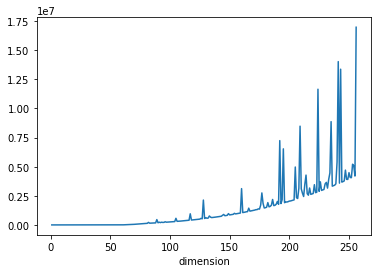

In [31]:
df_two_way_cache_no_funcion_defecto['miss_count'].plot()

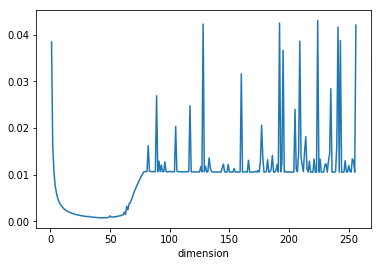

In [32]:
df_two_way_cache_no_funcion_defecto['miss_rate'].plot()

In [33]:
df_four_way_cache_no_funcion_defecto=df_merge.loc[(df_merge['estado_cache']=='clear_cache=yes') & ( df_merge['cache_datos']== '--D1=32768,4,32') & ( df_merge['funcion_usada']== 'src/mult/mmult_naive_c.c')].copy()
df_four_way_cache_no_funcion_defecto['miss_count']=df_four_way_cache_no_funcion_defecto['D1_miss_reads'] + df_four_way_cache_no_funcion_defecto['D1_miss_writes']
df_four_way_cache_no_funcion_defecto['accesos_totales_a_cache_datos']=df_four_way_cache_no_funcion_defecto['Data_reads']+ df_four_way_cache_no_funcion_defecto['Data_writes']
df_four_way_cache_no_funcion_defecto['miss_rate']=df_four_way_cache_no_funcion_defecto['miss_count']/df_four_way_cache_no_funcion_defecto['accesos_totales_a_cache_datos']

In [34]:
df_four_way_cache_no_funcion_defecto.set_index('dimension',inplace=True)

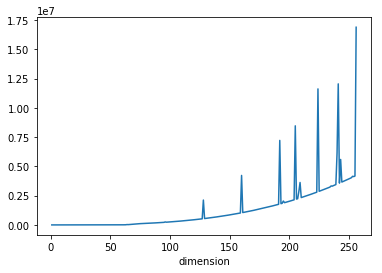

In [35]:
df_four_way_cache_no_funcion_defecto['miss_count'].plot()

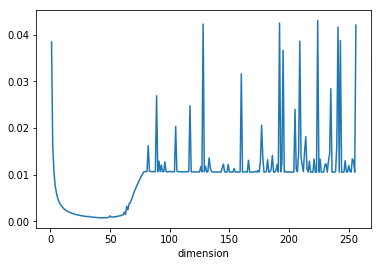

In [36]:
df_two_way_cache_no_funcion_defecto['miss_rate'].plot()

In [37]:
df_merge['cache_datos']

0          --D1=32768,1,32
1          --D1=32768,1,32
2          --D1=32768,1,32
3          --D1=32768,1,32
4          --D1=32768,1,32
5          --D1=32768,1,32
6          --D1=32768,1,32
7          --D1=32768,1,32
8          --D1=32768,1,32
9          --D1=32768,1,32
10         --D1=32768,1,32
11         --D1=32768,1,32
12         --D1=32768,1,32
13         --D1=32768,1,32
14         --D1=32768,1,32
15         --D1=32768,1,32
16         --D1=32768,1,32
17         --D1=32768,1,32
18         --D1=32768,1,32
19         --D1=32768,1,32
20         --D1=32768,1,32
21         --D1=32768,1,32
22         --D1=32768,1,32
23         --D1=32768,1,32
24         --D1=32768,1,32
25         --D1=32768,1,32
26         --D1=32768,1,32
27         --D1=32768,1,32
28         --D1=32768,1,32
29         --D1=32768,1,32
               ...        
4065    --D1=32768,1024,32
4066    --D1=32768,1024,32
4067    --D1=32768,1024,32
4068    --D1=32768,1024,32
4069    --D1=32768,1024,32
4070    --D1=32768,1024,32
4

In [38]:
df_fully_assoc_cache_no_funcion_defecto=df_merge.loc[(df_merge['estado_cache']=='clear_cache=yes') & ( df_merge['cache_datos']== '--D1=32768,1024,32') & ( df_merge['funcion_usada']== 'src/mult/mmult_naive_c.c')].copy()
df_fully_assoc_cache_no_funcion_defecto['miss_count']=df_fully_assoc_cache_no_funcion_defecto['D1_miss_reads'] + df_fully_assoc_cache_no_funcion_defecto['D1_miss_writes']
df_fully_assoc_cache_no_funcion_defecto['accesos_totales_a_cache_datos']=df_fully_assoc_cache_no_funcion_defecto['Data_reads']+ df_fully_assoc_cache_no_funcion_defecto['Data_writes']
df_fully_assoc_cache_no_funcion_defecto['miss_rate']=df_fully_assoc_cache_no_funcion_defecto['miss_count']/df_fully_assoc_cache_no_funcion_defecto['accesos_totales_a_cache_datos']

In [39]:
df_fully_assoc_cache_no_funcion_defecto.set_index('dimension',inplace=True)

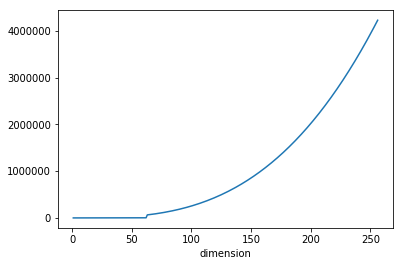

In [40]:
df_fully_assoc_cache_no_funcion_defecto['miss_count'].plot()

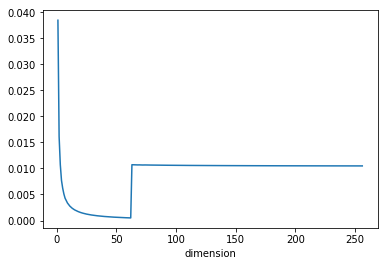

In [41]:
df_fully_assoc_cache_no_funcion_defecto['miss_rate'].plot()

In [42]:
df_direct_map_cache_no_funcion_asm=df_merge.loc[(df_merge['estado_cache']=='clear_cache=yes') & ( df_merge['cache_datos']== '--D1=32768,1,32') & ( df_merge['funcion_usada']== 'src/mult/mmult_asm.S')].copy()
df_direct_map_cache_no_funcion_asm['miss_count']=df_direct_map_cache_no_funcion_asm['D1_miss_reads'] + df_direct_map_cache_no_funcion_asm['D1_miss_writes']
df_direct_map_cache_no_funcion_asm['accesos_totales_a_cache_datos']=df_direct_map_cache_no_funcion_asm['Data_reads']+ df_direct_map_cache_no_funcion_asm['Data_writes']
df_direct_map_cache_no_funcion_asm['miss_rate']=df_direct_map_cache_no_funcion_asm['miss_count']/df_direct_map_cache_no_funcion_asm['accesos_totales_a_cache_datos']

In [43]:
df_direct_map_cache_no_funcion_asm.set_index('dimension',inplace=True)

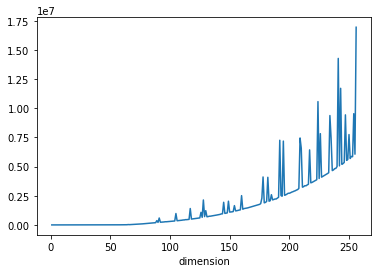

In [44]:
df_direct_map_cache_no_funcion_asm['miss_count'].plot()

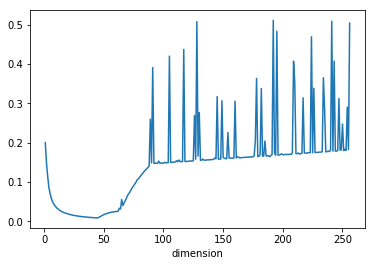

In [45]:
df_direct_map_cache_no_funcion_asm['miss_rate'].plot()

In [46]:
df_two_way_cache_no_funcion_asm=df_merge.loc[(df_merge['estado_cache']=='clear_cache=yes') & ( df_merge['cache_datos']== '--D1=32768,2,32') & ( df_merge['funcion_usada']== 'src/mult/mmult_asm.S')].copy()
df_two_way_cache_no_funcion_asm['miss_count']=df_two_way_cache_no_funcion_asm['D1_miss_reads'] + df_two_way_cache_no_funcion_asm['D1_miss_writes']
df_two_way_cache_no_funcion_asm['accesos_totales_a_cache_datos']=df_two_way_cache_no_funcion_asm['Data_reads']+ df_two_way_cache_no_funcion_asm['Data_writes']
df_two_way_cache_no_funcion_asm['miss_rate']=df_two_way_cache_no_funcion_asm['miss_count']/df_two_way_cache_no_funcion_asm['accesos_totales_a_cache_datos']

In [47]:
df_two_way_cache_no_funcion_asm.set_index('dimension',inplace=True)

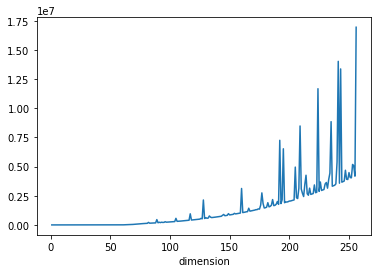

In [48]:
df_two_way_cache_no_funcion_asm['miss_count'].plot()

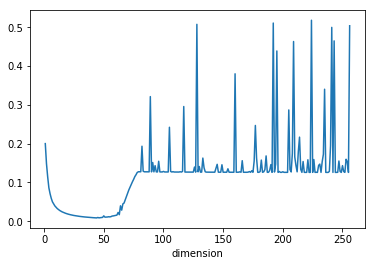

In [49]:
df_two_way_cache_no_funcion_asm['miss_rate'].plot()

In [50]:
df_four_way_cache_no_funcion_asm=df_merge.loc[(df_merge['estado_cache']=='clear_cache=yes') & ( df_merge['cache_datos']== '--D1=32768,4,32') & ( df_merge['funcion_usada']== 'src/mult/mmult_asm.S')].copy()
df_four_way_cache_no_funcion_asm['miss_count']=df_four_way_cache_no_funcion_asm['D1_miss_reads'] + df_four_way_cache_no_funcion_asm['D1_miss_writes']
df_four_way_cache_no_funcion_asm['accesos_totales_a_cache_datos']=df_four_way_cache_no_funcion_asm['Data_reads']+ df_four_way_cache_no_funcion_asm['Data_writes']
df_four_way_cache_no_funcion_asm['miss_rate']=df_four_way_cache_no_funcion_asm['miss_count']/df_four_way_cache_no_funcion_asm['accesos_totales_a_cache_datos']

In [51]:
df_four_way_cache_no_funcion_asm.set_index('dimension',inplace=True)

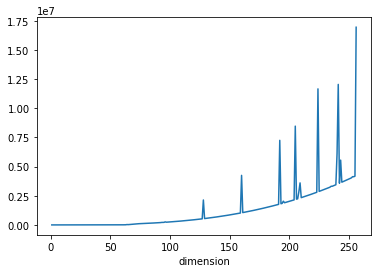

In [52]:
df_four_way_cache_no_funcion_asm['miss_count'].plot()

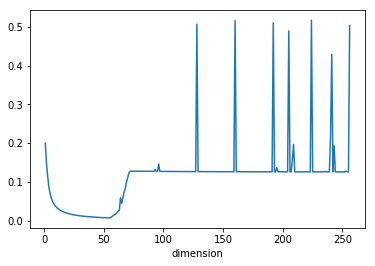

In [53]:
df_four_way_cache_no_funcion_asm['miss_rate'].plot()

In [54]:
df_fully_assoc_cache_no_funcion_asm=df_merge.loc[(df_merge['estado_cache']=='clear_cache=yes') & ( df_merge['cache_datos']== '--D1=32768,1024,32') & ( df_merge['funcion_usada']== 'src/mult/mmult_asm.S')].copy()
df_fully_assoc_cache_no_funcion_asm['miss_count']=df_fully_assoc_cache_no_funcion_asm['D1_miss_reads'] + df_fully_assoc_cache_no_funcion_asm['D1_miss_writes']
df_fully_assoc_cache_no_funcion_asm['accesos_totales_a_cache_datos']=df_fully_assoc_cache_no_funcion_asm['Data_reads']+ df_fully_assoc_cache_no_funcion_asm['Data_writes']
df_fully_assoc_cache_no_funcion_asm['miss_rate']=df_fully_assoc_cache_no_funcion_asm['miss_count']/df_fully_assoc_cache_no_funcion_asm['accesos_totales_a_cache_datos']

In [55]:
df_fully_assoc_cache_no_funcion_asm.set_index('dimension',inplace=True)

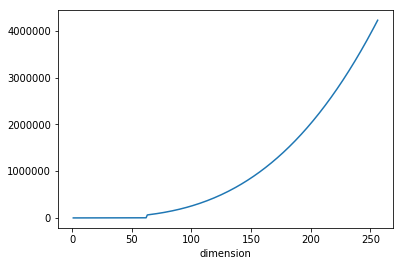

In [56]:
df_fully_assoc_cache_no_funcion_asm['miss_count'].plot()

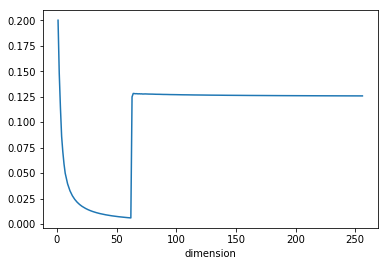

In [57]:
df_fully_assoc_cache_no_funcion_asm['miss_rate'].plot()